In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score


In [2]:
df = pd.read_csv('df1.csv')
df.head()

,age,fnlwgt,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,25,226802,40,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,38,89814,50,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,28,336951,40,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,44,160323,40,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
4,18,103497,30,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


# The High Performance Models:

In [3]:
# Determining the target variable and features, and scaling the features
X = df.drop('income_>50K', axis=1)
y = df['income_>50K']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## 1. Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression


# Logistic Regression model
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Logistic Regression with Correct Encoding:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob, average='weighted'):.2f}")

Logistic Regression with Correct Encoding:
Accuracy: 0.84
Precision: 0.83
Recall: 0.84
F1-score: 0.83
ROC-AUC: 0.89


In [5]:
# To check if the model has high variance or bias 
# Evaluate on training data
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
print("Training Metrics")
print(f"Accuracy: {train_accuracy:.2f}, Precision: {train_precision:.2f}, Recall: {train_recall:.2f}, F1-score: {train_f1:.2f}")


Training Metrics
Accuracy: 0.84, Precision: 0.83, Recall: 0.84, F1-score: 0.83


In [9]:
# Define the parameter grid for hyperparameter tuning
param_dist = {
    'C': np.logspace(-4, 4, 20),  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers that support regularization
    'penalty': ['l1', 'l2'],  # Regularization penalty
}

# Randomized Search
random_search = RandomizedSearchCV(
    LogisticRegression(max_iter=5000, random_state=42),  # Increased max_iter
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    cv=5,
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    random_state=42,
    verbose=2
)

random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters for Logistic Regression:", random_search.best_params_)
print("Best cross-validation accuracy:", random_search.best_score_)

# Train the best model
best_lr = random_search.best_estimator_
best_lr.fit(X_train, y_train)

# Predict on the test set
y_pred = best_lr.predict(X_test)

# Evaluate the model
print("Logistic Regression with Best Hyperparameters:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred, average='weighted'):.2f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.08858667904100823}
Best cross-validation accuracy: 0.8357756746222054
Logistic Regression with Best Hyperparameters:
Accuracy: 0.84
Precision: 0.83
Recall: 0.84
F1-score: 0.83
[CV] END C=0.08858667904100823, penalty=l2, solver=liblinear; total time=   1.9s
[CV] END .....C=0.08858667904100823, penalty=l2, solver=saga; total time=  29.4s
[CV] END .....C=0.23357214690901212, penalty=l1, solver=saga; total time=  50.4s
[CV] END .....C=0.23357214690901212, penalty=l2, solver=saga; total time=  38.0s
[CV] END .......C=3792.690190732246, penalty=l1, solver=saga; total time= 1.0min
[CV] END ........C=206.913808111479, penalty=l1, solver=saga; total time= 1.1min
[CV] END ..C=0.00026366508987303583, penalty=l1, solver=saga; total time=   1.4s
[CV] END .......C=4.281332398719396, penalty=l2, solver=saga; total time=  46.3s
[CV] END ..C=78.475997035

In [152]:
y_test.shape

(9758,)

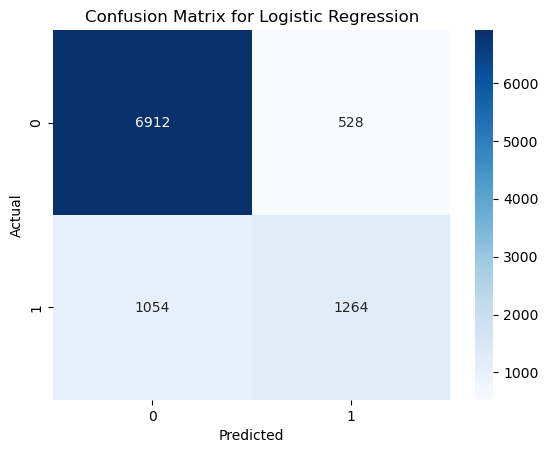

In [14]:
# Confusion Matrix for logistic regression 

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')


plt.savefig('LogReg_CM.jpg', format='jpg')

plt.show()


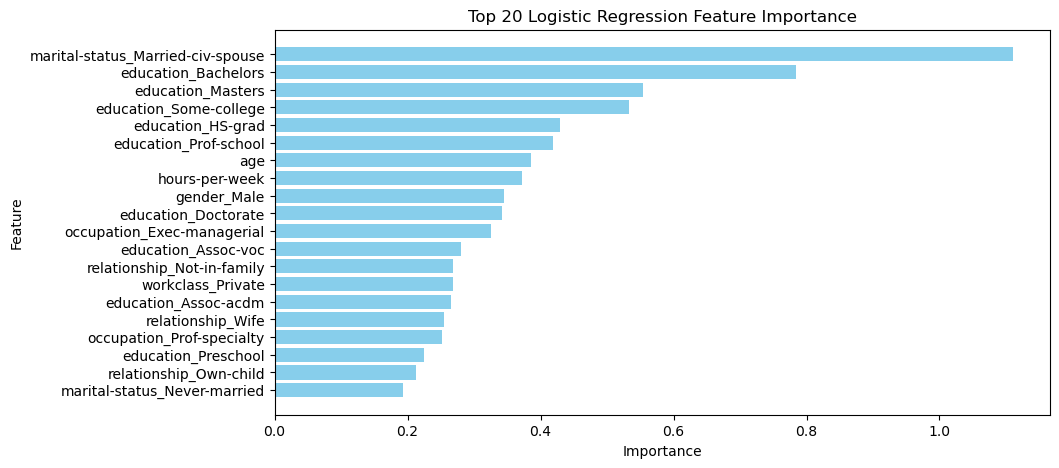

In [61]:
# Feature Importance for Logistic Regression
feature_names = X.columns

# Extract feature importances
logistic_importance = np.abs(model.coef_[0])
logistic_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': logistic_importance})
logistic_importance_df = logistic_importance_df.sort_values(by='Importance', ascending=False).head(20)

# Plot Logistic Regression Feature Importance
plt.figure(figsize=(10, 5))
plt.barh(logistic_importance_df['Feature'], logistic_importance_df['Importance'], color='skyblue')
plt.title('Top 20 Logistic Regression Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  
plt.show()


## 2. Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Evaluate the model
y_pred = random_forest.predict(X_test)
print("Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
cv_scores = cross_val_score(random_forest, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")
print("\n")


Random Forest:
Accuracy: 0.82
Precision: 0.81
Recall: 0.82
F1-score: 0.82
Cross-Validation Accuracy: 0.83 ± 0.00




In [16]:
# Hyperparameter tuning for Random Forest

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Randomized Search
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,  
    cv=5,
    scoring='accuracy',
    n_jobs=-1,  
    random_state=42,
    verbose=2
)

random_search.fit(X_train, y_train)

# Best parameters and best score
#print("Best parameters for Random Forest:", random_search.best_params_)
print("Best cross-validation accuracy:", random_search.best_score_)

# Train the best model
best_rf = random_search.best_estimator_
best_rf.fit(X_train, y_train)

# Predict on the test set
y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]  # For ROC-AUC

# Print performance metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob, average='weighted'):.2f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best cross-validation accuracy: 0.8411046853797781
Accuracy: 0.84
Precision: 0.83
Recall: 0.84
F1-score: 0.83
ROC-AUC: 0.89


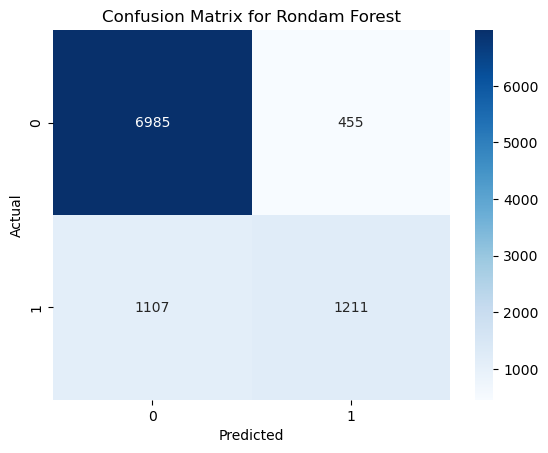

In [17]:
# Confusion Matrix for Rondam Forest

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Rondam Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.savefig('RanFo_CM.jpg', format='jpg')
plt.show()

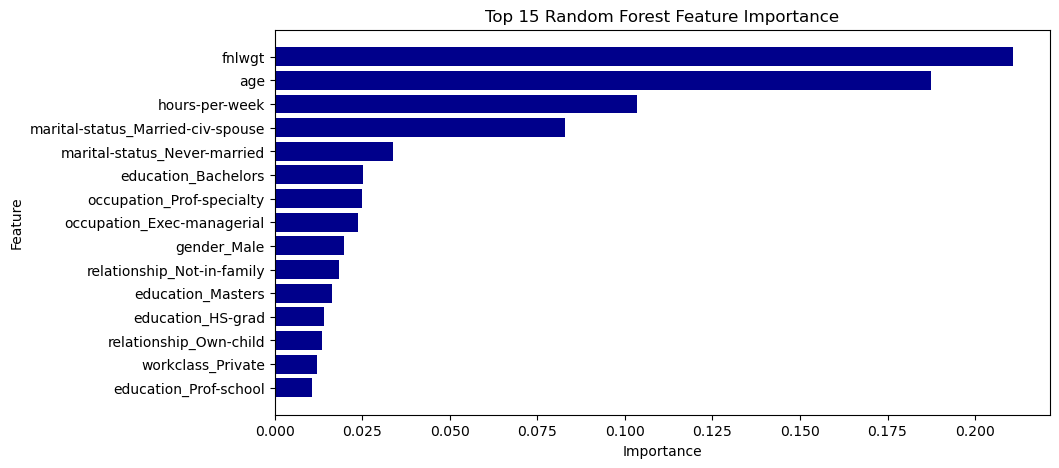

In [57]:
# Feature Importance
# Keep the feature names
feature_names = X.columns

importance = random_forest.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(15)

# Plot top 15 feature importance
plt.figure(figsize=(10, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='darkblue')
plt.title('Top 15 Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  
plt.show()

## 3. Gradient Boosting

In [6]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)

# Evaluate the model
y_pred = gradient_boosting.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cv_scores = cross_val_score(gradient_boosting, X, y, cv=5, scoring='accuracy')

print(f"Gradient Boosting - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}, Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")


Gradient Boosting - Accuracy: 0.84, Precision: 0.83, Recall: 0.84, F1-score: 0.83, Cross-Validation Accuracy: 0.84 ± 0.00


In [7]:
# To check if the model has high variance or bias 
# Evaluate on training data
y_train_pred = gradient_boosting.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
print("Training Metrics")
print(f"Accuracy: {train_accuracy:.2f}, Precision: {train_precision:.2f}, Recall: {train_recall:.2f}, F1-score: {train_f1:.2f}")


Training Metrics
Accuracy: 0.84, Precision: 0.84, Recall: 0.84, F1-score: 0.83


In [35]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter tuning for Gradient Boosting using RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Randomized Search
random_search = RandomizedSearchCV(
    GradientBoostingClassifier(),
    param_distributions=param_dist,
    n_iter=50,  
    cv=5,
    scoring='accuracy',
    n_jobs=-1,  
    random_state=42,
    verbose=2
)

random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters for Gradient Boosting:", random_search.best_params_)
print("Best cross-validation accuracy:", random_search.best_score_)

# Train the best model
best_gb = random_search.best_estimator_
best_gb.fit(X_train, y_train)

# Predict on the test set
y_pred = best_gb.predict(X_test)
y_prob = best_gb.predict_proba(X_test)[:, 1] 

# Print performance metrics
print("Gradient Boosting with Best Hyperparameters:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob, average='weighted'):.2f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for Gradient Boosting: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.2}
Best cross-validation accuracy: 0.8410790443718087
Gradient Boosting with Best Hyperparameters:
Accuracy: 0.84
Precision: 0.83
Recall: 0.84
F1-score: 0.84
ROC-AUC: 0.89


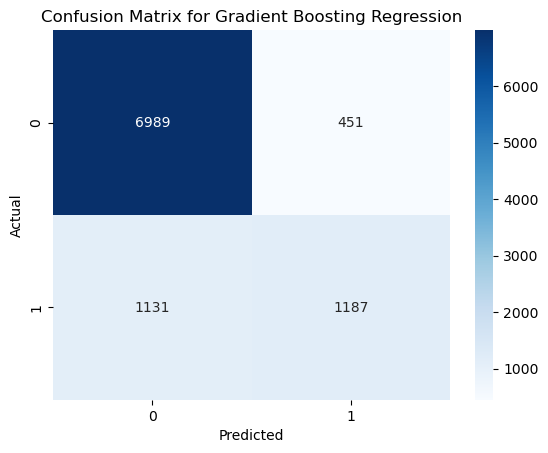

In [19]:
# Confusion Matrix for Gradient Boosting 

conf_matrix3 = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Gradient Boosting Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.savefig('GraBo_CM.jpg', format='jpg')

plt.show()

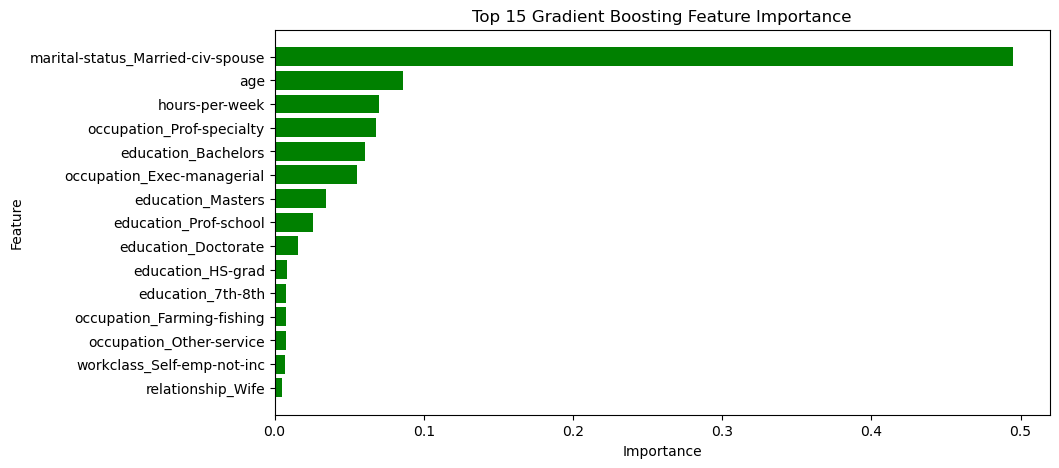

In [47]:
# Extract feature importances
# Keep the feature names
feature_names = X.columns


importance = gradient_boosting.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(15)

# Plot top 15 feature importance
plt.figure(figsize=(10, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='green')
plt.title('Top 15 Gradient Boosting Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()

plt.show()


## 4. XGBoost

In [48]:
#!pip install xgboost
from xgboost import XGBClassifier

# XGBoost
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)

# Evaluate the model
y_pred = xgboost.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cv_scores = cross_val_score(xgboost, X, y, cv=5, scoring='accuracy')

print(f"XGBoost - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}, Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

XGBoost - Accuracy: 0.84, Precision: 0.83, Recall: 0.84, F1-score: 0.83, Cross-Validation Accuracy: 0.84 ± 0.00


In [28]:
# Define the model
xgb_model = XGBClassifier(random_state=42)

# Define the parameter distribution
param_dist = {
    'eta': [0.01, 0.1, 0.3],
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.3]
}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    cv=5,
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    random_state=42,
    verbose=2
)

random_search.fit(X_train, y_train)

# Evaluate the model with the best parameters
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

print("XGBoost with Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.2f}")
print("Best cross-validation accuracy:", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
XGBoost with Hyperparameter Tuning:
Accuracy: 0.84
Precision: 0.83
Recall: 0.84
F1-score: 0.84
ROC-AUC Score: 0.89
Best cross-validation accuracy: 0.8428724381021375


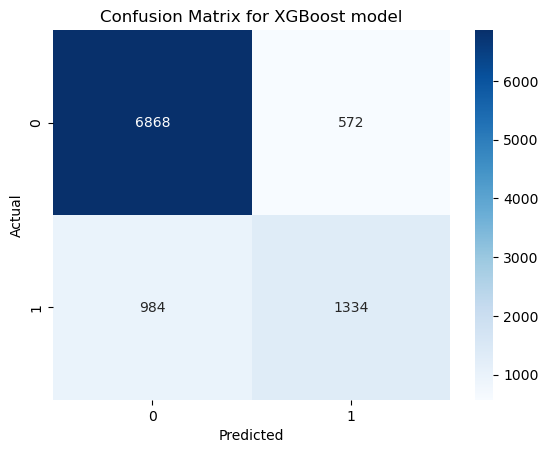

In [21]:
# Confusion Matrix for XGBoost

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for XGBoost model')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.savefig('XGB_CM.jpg', format='jpg')
plt.show()

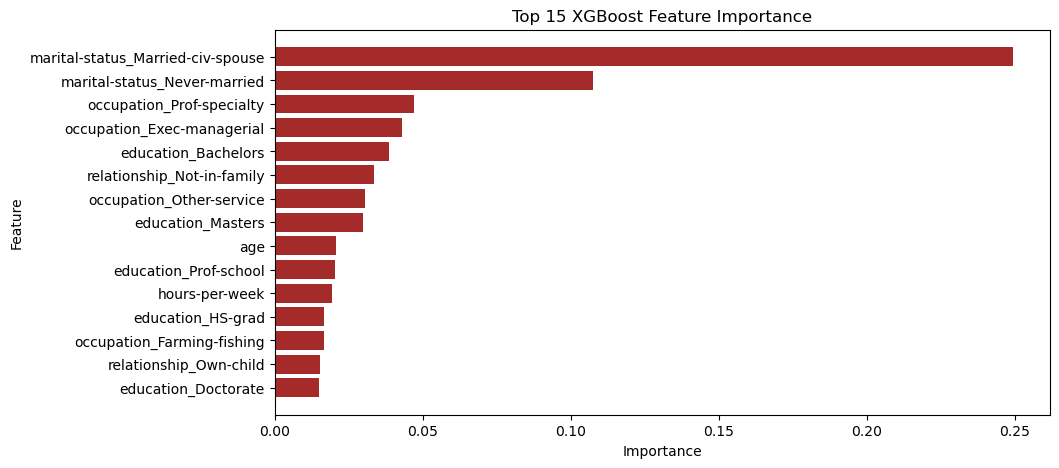

In [49]:
# Feature Importance for XGBoost
xgboost_importance = best_model.feature_importances_
xgboost_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': xgboost_importance})
xgboost_importance_df = xgboost_importance_df.sort_values(by='Importance', ascending=False).head(15)

# Plot XGBoost Feature Importance
plt.figure(figsize=(10, 5))
plt.barh(xgboost_importance_df['Feature'], xgboost_importance_df['Importance'], color='brown')
plt.title('Top 15 XGBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis() 


plt.savefig('xgboost_feature_importance.jpg', format='jpg')
plt.show()


### 5. k-Nearest Neighbors (k-NN):

In [4]:
from sklearn.neighbors import KNeighborsClassifier


# Find the k with the highest cross-validation score
k_values = range(1, 30)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())


optimal_k = k_values[np.argmax(cv_scores)]
print(f"The optimal number of neighbors is {optimal_k}")

The optimal number of neighbors is 14


In [62]:
# k-Nearest Neighbors (k-NN)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)

# Evaluate the model
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cv_scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')

print(f"k-Nearest Neighbors (k-NN) - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}, Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")


k-Nearest Neighbors (k-NN) - Accuracy: 0.83, Precision: 0.82, Recall: 0.83, F1-score: 0.82, Cross-Validation Accuracy: 0.76 ± 0.00


In [8]:
# Hyperparameter tuning for k-NN using RandomizedSearchCV
param_dist = {
    'n_neighbors': [3, 5, 7, 9, 18],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Randomized Search
random_search = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_dist,
    n_iter=20,  # Number of parameter settings that are sampled
    cv=5,
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    random_state=42,
    verbose=2
)

random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters for k-NN:", random_search.best_params_)
print("Best cross-validation accuracy:", random_search.best_score_)

# Train the best model
best_knn = random_search.best_estimator_
best_knn.fit(X_train, y_train)

# Predict on the test set
y_pred = best_knn.predict(X_test)
if hasattr(best_knn, "predict_proba"):
    y_prob = best_knn.predict_proba(X_test)[:, 1]
else:
    y_prob = best_knn.predict(X_test)

# Print performance metrics
print("k-NN with Best Hyperparameters:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob, average='weighted'):.2f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for k-NN: {'weights': 'uniform', 'n_neighbors': 18, 'metric': 'euclidean'}
Best cross-validation accuracy: 0.824477198947803
k-NN with Best Hyperparameters:
Accuracy: 0.83
Precision: 0.82
Recall: 0.83
F1-score: 0.82
ROC-AUC: 0.87
[CV] END ..metric=minkowski, n_neighbors=9, weights=distance; total time=   2.1s
[CV] END ..metric=manhattan, n_neighbors=7, weights=distance; total time=  18.3s
[CV] END ..metric=euclidean, n_neighbors=18, weights=uniform; total time=   2.2s
[CV] END ..metric=euclidean, n_neighbors=18, weights=uniform; total time=   2.3s
[CV] END ..metric=minkowski, n_neighbors=18, weights=uniform; total time=   2.2s
[CV] END ...metric=minkowski, n_neighbors=7, weights=uniform; total time=   2.2s
[CV] END ...metric=manhattan, n_neighbors=5, weights=uniform; total time=  17.9s
[CV] END ..metric=euclidean, n_neighbors=7, weights=distance; total time=   2.1s
[CV] END ..metric=manhattan, n_neighbors=5, 

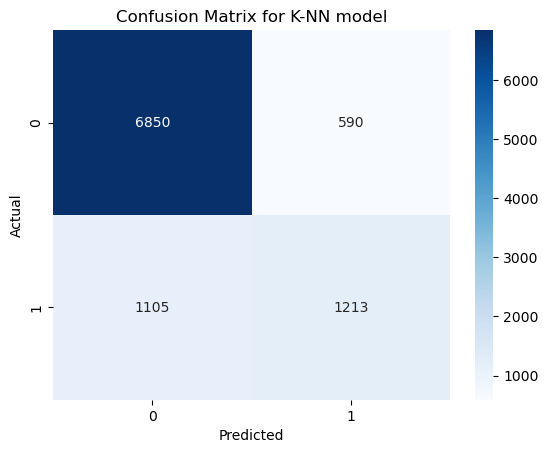

[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   5.0s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   6.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   5.4s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   5.5s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.8s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   4.8s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   1.3s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total 

In [23]:
# Confusion Matrix for KNN

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for K-NN model')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.savefig('KNN_CM.jpg', format='jpg')
plt.show()

In [ ]:
# Compute Permutation Feature Importance for KNN
from sklearn.inspection import permutation_importance

feature_names = X.columns

result = permutation_importance(knn, X_test, y_test, n_repeats=30, random_state=42, n_jobs=-1)

# Create a DataFrame for the importances
knn_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': result.importances_mean})
knn_importance_df = knn_importance_df.sort_values(by='Importance', ascending=False).head(15)

# Plot Permutation Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(knn_importance_df['Feature'], knn_importance_df['Importance'], color='lightgreen')
plt.title('KNN Feature Importance (Permutation)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  
plt.show()


## Models Performance Graph:

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import time


# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000, solver='liblinear'),
    'k-NN': KNeighborsClassifier(n_neighbors=14),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

# Store performance metrics
performance = []

for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    
    training_time = end_time - start_time
    
    y_pred = model.predict(X_test)
    
    performance.append({
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-score': f1_score(y_test, y_pred, average='weighted'),
        'Training Time (s)': training_time
    })

performance_df = pd.DataFrame(performance)


                 Model  Accuracy  Precision    Recall  F1-score  \
0  Logistic Regression  0.838082   0.829355  0.838082  0.830485   
1                 k-NN  0.826296   0.816357  0.826296  0.818348   
2        Random Forest  0.825579   0.816645  0.825579  0.819043   
3    Gradient Boosting  0.837877   0.828396  0.837877  0.827485   
4              XGBoost  0.840541   0.833161  0.840541  0.834913   

   Training Time (s)  
0           0.698021  
1           0.012219  
2           2.437390  
3           3.897158  
4           0.201156  


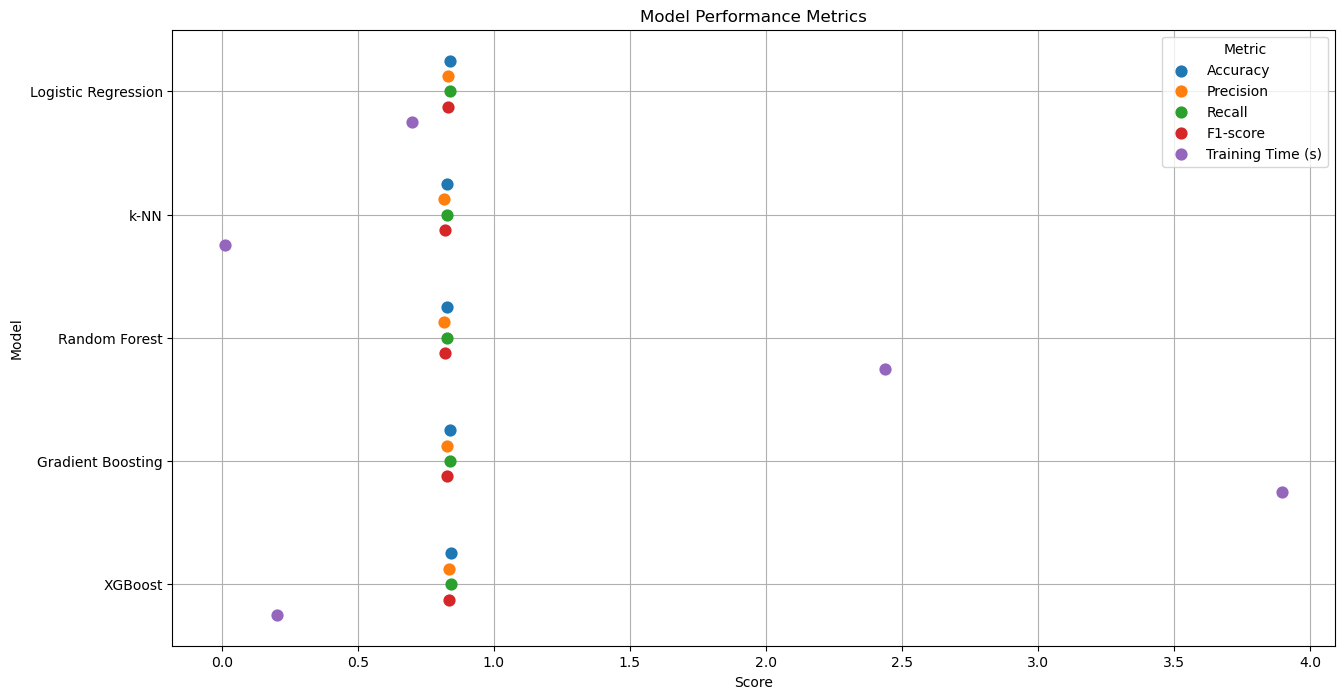

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the DataFrame for easier plotting with seaborn
performance_melted = performance_df.melt(id_vars='Model', var_name='Metric', value_name='Score')


print(performance_df)

# Plot using seaborn
plt.figure(figsize=(15, 8))
sns.pointplot(data=performance_melted, x='Score', y='Model', hue='Metric', join=False, dodge=0.5)
plt.title('Model Performance Metrics')
plt.xlabel('Score')
plt.ylabel('Model')
plt.legend(title='Metric')
plt.grid(True)
plt.show()
